## 本书提供的魔法命令

### ％C

`%C`将多个输出横排显示，减少书中的空白：

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0, 100, (10, 4)), columns=["A", "B", "C", "D"])
%C 5 df; df[df.A > 50]; df[["A", "D"]]; df.sum(axis=1)

d:\program files\python\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


        df              df[df.A > 50]       df[["A", "D"]]     df.sum(axis=1)
-----------------     -----------------     --------------     --------------
    A   B   C   D         A   B   C   D         A   D          0    200      
0  74  35  84   7     0  74  35  84   7     0  74   7          1    221      
1  13  68  49  91     2  69  92  61  58     1  13  91          2    280      
2  69  92  61  58     4  94  32  44  58     2  69  58          3    197      
3  38  49  49  61     5  86  30  26  40     3  38  61          4    228      
4  94  32  44  58     6  57  14  73   6     4  94  58          5    182      
5  86  30  26  40     9  93   8   8   1     5  86  40          6    150      
6  57  14  73   6                           6  57   6          7     34      
7   5  15  14   0                           7   5   0          8    232      
8  30  95  57  50                           8  30  50          9    110      
9  93   8   8   1                           9  93   1          d

### %find

`%find`在指定的对象中搜索属性，下面的程序在`np`中搜索以`array`开头，或者包含`mul`的属性名：

In [2]:
%find array* *mul* np

['array',
 'array2string',
 'array_equal',
 'array_equiv',
 'array_repr',
 'array_split',
 'array_str',
 'matmul',
 'multiply',
 'polymul',
 'ravel_multi_index']

### %%cut

`%%cut`限制程序输出的总字符数或总行数：

In [5]:
%%cut -l 5
for i in range(10000):
    print(("I am line", i))

I am line 0
I am line 1
I am line 2
I am line 3
I am line 4

OSError: Too many lines

### ％array_image

`%array_image`将多个数组拼成一幅图像显示：

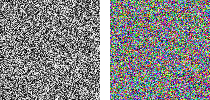

In [6]:
import numpy as np
a = np.random.rand(100, 100)
b = np.random.rand(100, 100, 3)
%array_image a; b

### %col

`%col`分列显示序列：

In [8]:
a = range(30)
%col 6 a

range(0, 30)   


### %disabled

`%%disabled`不运行代码：

In [6]:
%%disabled
hello here

### %dot, %%dot

`%dot`对其参数求值，并将得到的字符串传递给Graphviz创建箭头图：

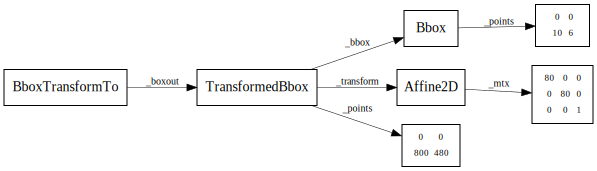

In [7]:
from scpy2.common import GraphvizMPLTransform
import pylab as pl
fig = pl.figure()
%dot GraphvizMPLTransform.graphviz(fig.transFigure)

`%%dot`将`dot`源文件传递给Graphviz创建箭头图：

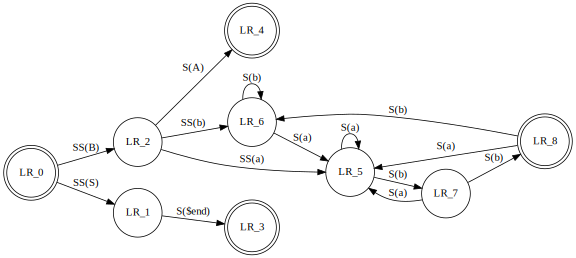

In [8]:
%%dot format=svg
digraph finite_state_machine {
    rankdir=LR;
    size="8,5"
    node [shape = doublecircle]; LR_0 LR_3 LR_4 LR_8;
    node [shape = circle];
    LR_0 -> LR_2 [ label = "SS(B)" ];
    LR_0 -> LR_1 [ label = "SS(S)" ];
    LR_1 -> LR_3 [ label = "S($end)" ];
    LR_2 -> LR_6 [ label = "SS(b)" ];
    LR_2 -> LR_5 [ label = "SS(a)" ];
    LR_2 -> LR_4 [ label = "S(A)" ];
    LR_5 -> LR_7 [ label = "S(b)" ];
    LR_5 -> LR_5 [ label = "S(a)" ];
    LR_6 -> LR_6 [ label = "S(b)" ];
    LR_6 -> LR_5 [ label = "S(a)" ];
    LR_7 -> LR_8 [ label = "S(b)" ];
    LR_7 -> LR_5 [ label = "S(a)" ];
    LR_8 -> LR_6 [ label = "S(b)" ];
    LR_8 -> LR_5 [ label = "S(a)" ];
}

### ％func_debug

`%func_debug`在指定的函数调用处设置断点，用于调试库函数的代码：

In [9]:
import random

In [10]:
%%func_debug random.shuffle
a = [1, 2, 3]
random.shuffle(a)

Breakpoint 1 at c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\random.py:277
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\random.py(285)shuffle()
    284 
--> 285         if random is None:
    286             random = self.random

ipdb> q


### ％include

`%include`载入`scpy2`文件夹下指定文件的指定部分，保证书中的代码与`scpy2`中的代码一致：

In [11]:
%%include cython cython/vector.pyx 8
cdef add_array(double *op1, double *op2, double *res, int count):
    cdef int i
    for i in range(count):
        res[i] = op1[i] + op2[i]

cdef add_number(double *op1, double op2, double *res, int count):
    cdef int i
    for i in range(count):
        res[i] = op1[i] + op2

### %%language

`%%language`不运行代码，在Notebook的Javascript插件根据其后的语言设置高亮显示，目前仅支持`c`：

In [12]:
%%language c
#include <stdio.h>
    
int main()
{
   return 0; 
}

### %matplotlib_png, %matplotlib_svg

`%matplotlib_png`和`%matplotlib_svg`切换matplotlib图表的输出格式：

In [9]:
%matplotlib_png

d:\program files\python\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['WenQuanYi Micro Hei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


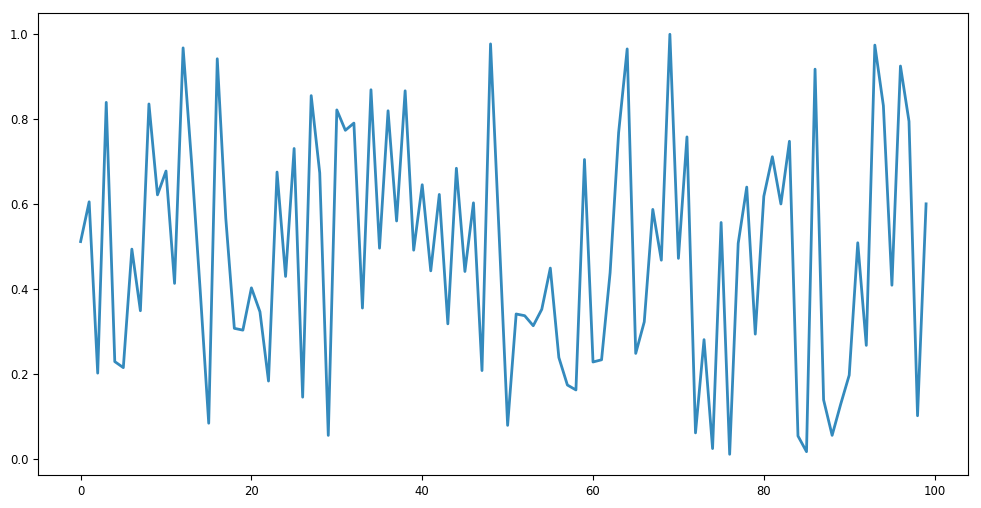

In [10]:
import pylab as pl
import numpy as np
pl.plot(np.random.rand(100));

In [12]:
%matplotlib_svg

d:\program files\python\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['WenQuanYi Micro Hei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


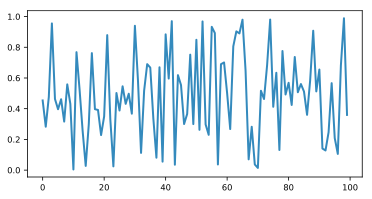

In [13]:
pl.plot(np.random.rand(100));

### %%mlab_plot

`%%mlab_plot`将Mayavi的场景截图嵌入到Notebook中：

In [14]:
%%mlab_plot
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

********************************************************************************
         to build the TVTK classes (7.1). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



ImportError: cannot import name 'vtk_scene_to_array'

### %%next_input

`%%next_input`将当前单元格的运算结果作为下个单元格的内容，他的行参数为作为输出的变量名：

In [18]:
%%next_input res
lines = []
for i in range(4):
    lines.append("print {}".format(i))
res = "\n".join(lines)

In [ ]:
print((0))
print((1))
print((2))
print((3))

### %%nopage

将在Page中显示的内容在单元的输出中显示，通常用于捕捉`%%prun`的输出：

In [21]:
%%nopage
%%prun
import random
a = range(100)
random.shuffle(a)

         104 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 random.py:277(shuffle)
        1    0.000    0.000    0.000    0.000 <string>:2(<module>)
       99    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {range}
        1    0.000    0.000    0.000    0.000 {len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
 

### %omit

`%omit`使用省略号显示较长的序列：

In [22]:
%omit 5 range(100)

[0,
 1,
 2,
 3,
 4,
...


### %%thread

`%%thread`在新线程中运行代码：

In [23]:
%%thread
import time
import sys
for i in range(10):
    time.sleep(2.0)

### %%exec_python

`%exec_python`在新进程中运行Python命令行，用于启动本书的实例程序。与`!python`不同，它不等待进程的运行结束。

In [24]:
%exec_python -m scpy2.examples.fractal.ifs_demo

### %init_sympy_printing

`%init_sympy_printing`调用`sympy.init_printing()`并删除与`__buildin__`模块中对象的显示方法。这样列表、元组等对象能采用通常的文本显示：

In [25]:
%init_sympy_printing

列表使用简单文本显示：

In [26]:
[1, 2, 3]

[1, 2, 3]

### %sympy_latex

当需要将列表或元组作为数学公式显示时，使用`%sympy_latex`：

In [ ]:
from sympy import symbols, solve
a, b, c, x = symbols("a,b,c,x")
%sympy_latex solve(a * x ** 2 + b * x + c, x)